In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import date as dt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder,StandardScaler,PowerTransformer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc,plot_roc_curve
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import r2_score,mean_absolute_error

import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
avacado = pd.read_csv('/Users/mitssverma/Documents/DataTrainned/DataSet/avocado.csv')
avacado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold


## EDA:

In [3]:
avacado.drop(columns = ['Unnamed: 0','Date'],axis = 1,inplace= True)
avacado.shape

(18249, 12)

Shape of our data is (18249,13)

In [4]:
avacado.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Describtion of the dataset.

- Count.
- Mean.
- Standard deviation.
- Mininum
- 1st Quantile (25%)
- 2nd Quantile (50%)
- 3rd Quantile (75%)
- Maximum.

In [5]:
avacado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.7+ MB


Information:
   - float(9) 
   - int(1)
   - object(3)

In [6]:
avacado.isna().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There are no null values present in our dataset.

In [7]:
avacado.duplicated().sum()

0

No duplicate Values.

## Visualisation :

In [904]:
def plot(x,y,data):
    plt.figure()
    plt.scatter(x,y,data=avacado)
    plt.xlabel(x)
    plt.ylabel(y)
    print('Scatterpot between',x,'and',y)
    plt.show()

Scatterpot between AveragePrice and Total Volume


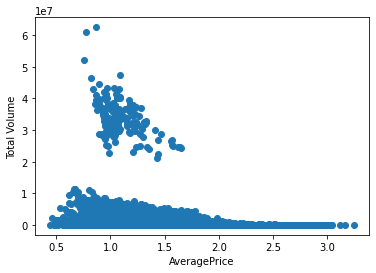

In [905]:
plot('AveragePrice','Total Volume',data = avacado)

Scatterpot between 4046 and Total Volume


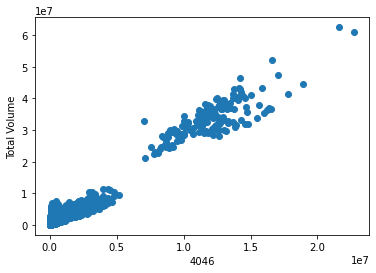

Scatterpot between 4225 and Total Volume


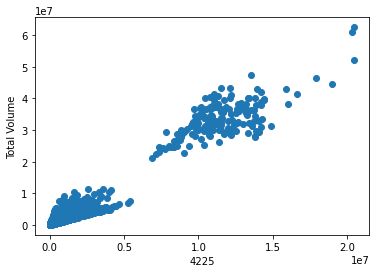

Scatterpot between 4770 and Total Volume


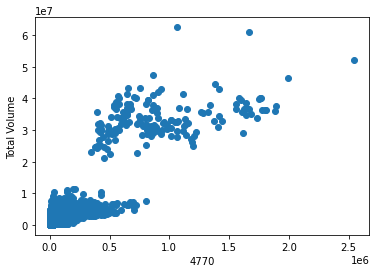

In [906]:
plot('4046','Total Volume',data = avacado)
plot('4225','Total Volume',data = avacado)
plot('4770','Total Volume',data = avacado)

Scatterpot between Total Bags and Total Volume


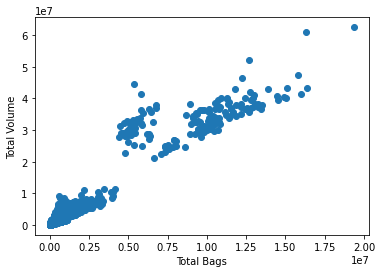

Scatterpot between Small Bags and Total Volume


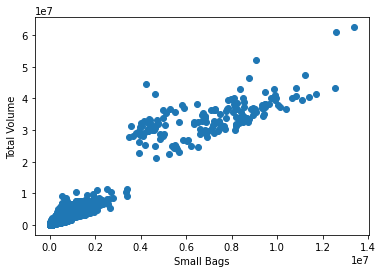

Scatterpot between Large Bags and Total Volume


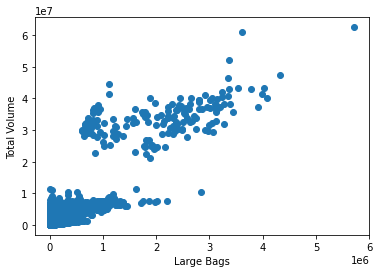

Scatterpot between XLarge Bags and Total Volume


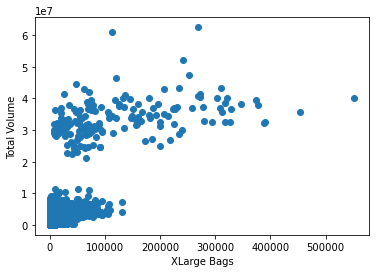

In [907]:
plot('Total Bags','Total Volume',data = avacado)
plot('Small Bags','Total Volume',data = avacado)
plot('Large Bags','Total Volume',data = avacado)
plot('XLarge Bags','Total Volume',data = avacado)

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

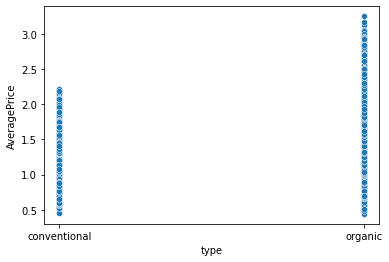

In [908]:
sns.scatterplot(y = avacado['AveragePrice'], x = avacado['type'])

<AxesSubplot:xlabel='Count', ylabel='region'>

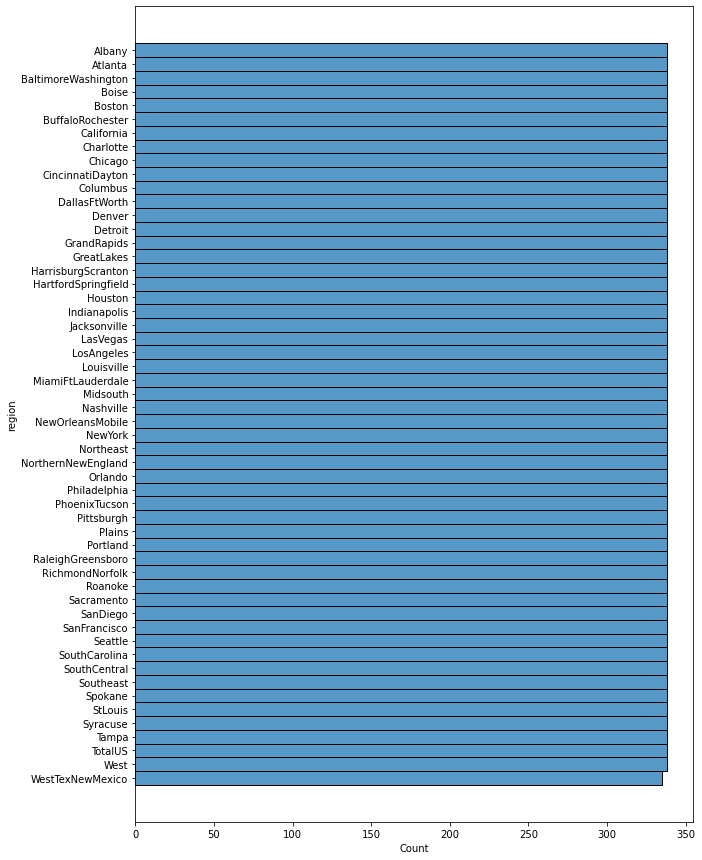

In [909]:
plt.figure(figsize=(10,15))
sns.histplot(y = avacado['region'])

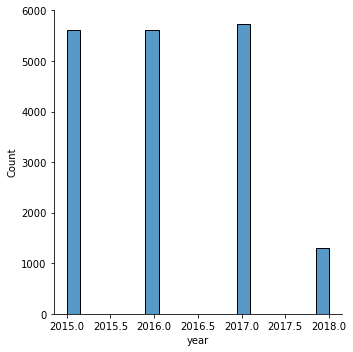

In [910]:
sns.displot(avacado['year'])

## Encoding :

In [8]:
avacado['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [9]:
avacado['type'] = avacado['type'].replace('organic',0)
avacado['type'] = avacado['type'].replace('conventional',1)

In [10]:
avacado['type']

0        1
1        1
2        1
3        1
4        1
        ..
18244    0
18245    0
18246    0
18247    0
18248    0
Name: type, Length: 18249, dtype: int64

In [11]:
avacado['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [12]:
lb = LabelEncoder()
avacado['region'] = lb.fit_transform(avacado['region'])

In [13]:
avacado['region'].value_counts()

0     338
40    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
41    338
1     338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
51    338
52    338
28    338
27    338
26    338
25    338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
53    335
Name: region, dtype: int64

## Normal Distribution :

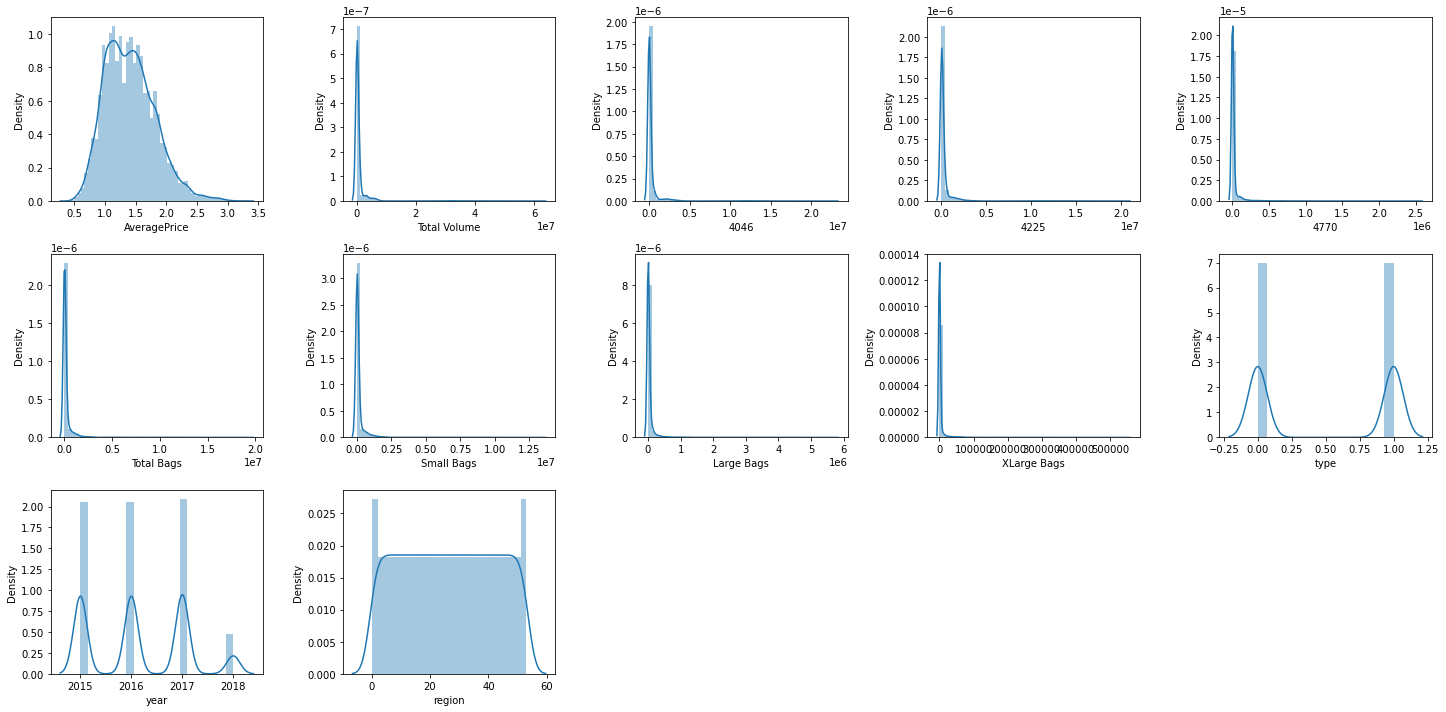

In [14]:
plt.figure(figsize=(20,10))
plotnumber = 1

for column in avacado:
    if plotnumber <= 15:
        ax = plt.subplot(3,5,plotnumber)
        sns.distplot(avacado[column])
        plt.xlabel(column)
    
    plotnumber+=1
plt.tight_layout()

## Outliers :

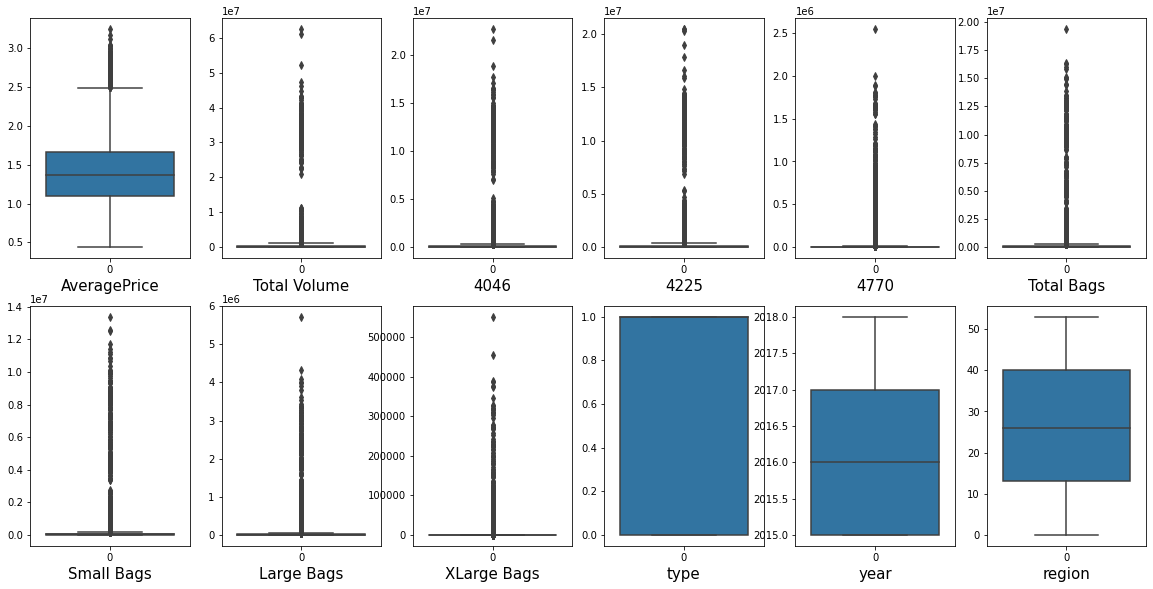

In [15]:
plt.figure(figsize = (20,15))
graph = 1
for column in avacado:
    if graph <= 18:
        plt.subplot(3,6,graph)
        ax = sns.boxplot(data = avacado[column])
        plt.xlabel(column, fontsize = 15)
    graph += 1
plt.show()

**- Power Transformation.**

In [20]:
fe = ['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']

In [21]:
scaler = PowerTransformer(method = 'yeo-johnson')
avacado[fe] = scaler.fit_transform(avacado[fe].values)

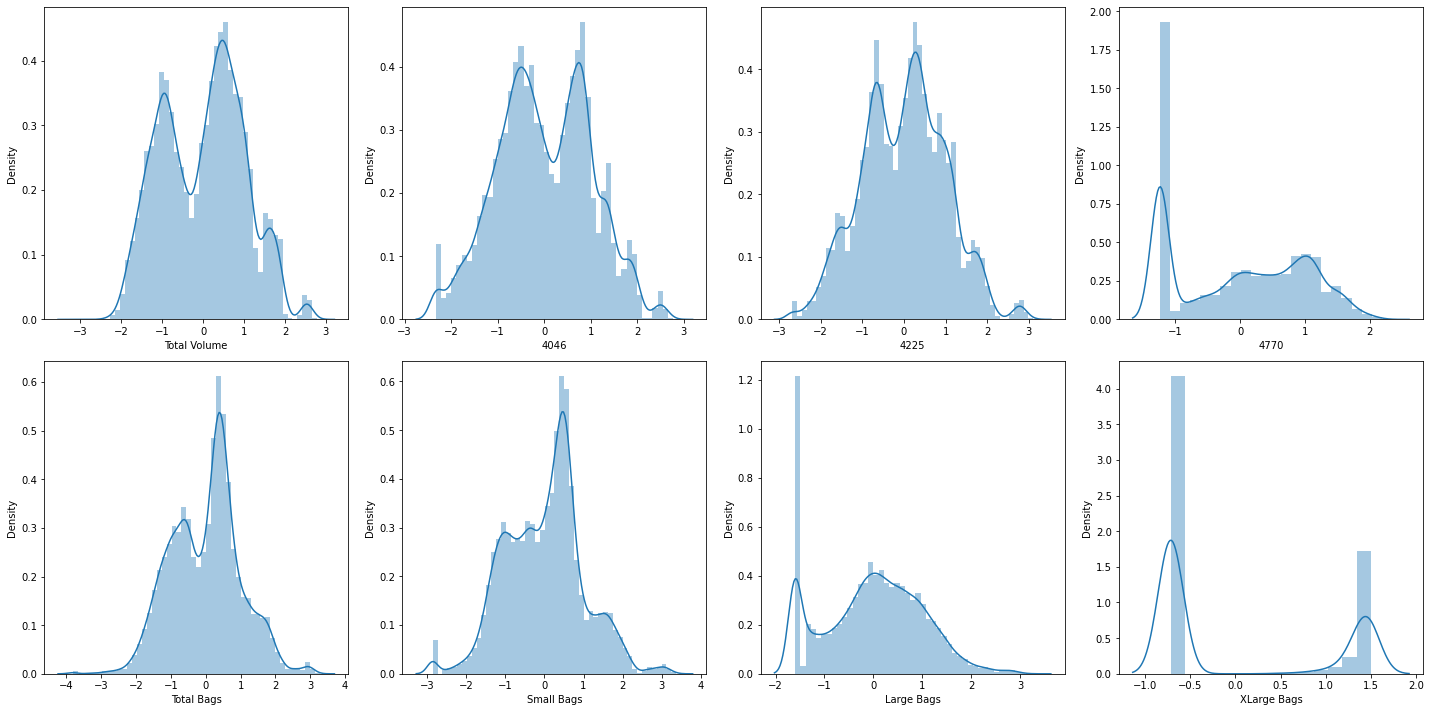

In [22]:
plt.figure(figsize=(20,10))
plotnumber = 1

for column in avacado[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]:
    if plotnumber <= 8:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(avacado[column])
        plt.xlabel(column)
    
    plotnumber+=1
plt.tight_layout()

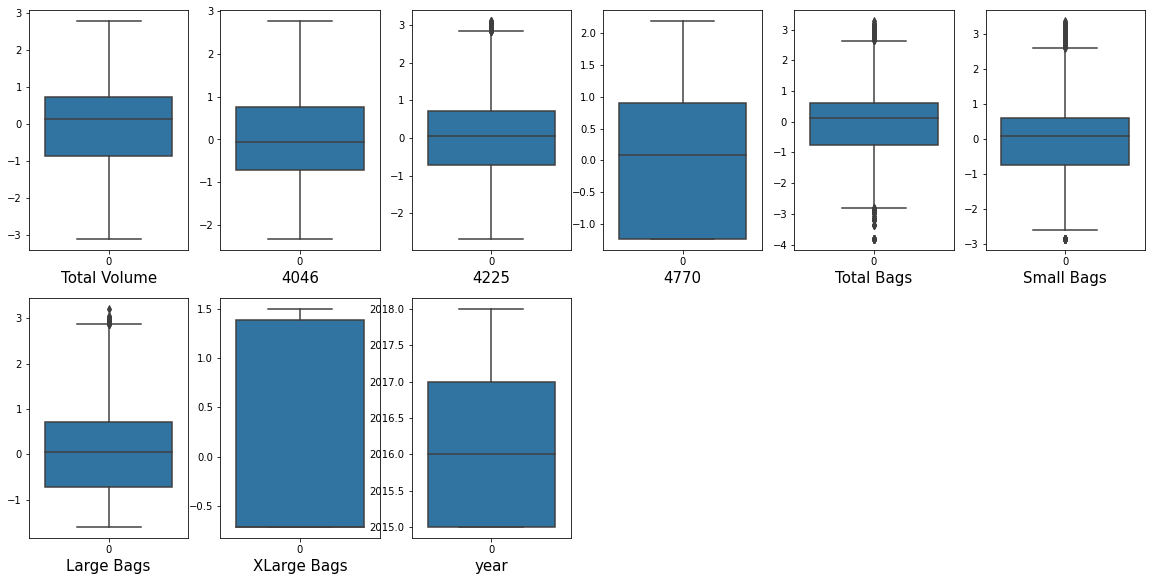

In [23]:
plt.figure(figsize = (20,15))
graph = 1
for column in avacado.drop(columns = ['AveragePrice','type','region'],axis = 1):
    if graph <= 18:
        plt.subplot(3,6,graph)
        ax = sns.boxplot(data = avacado[column])
        plt.xlabel(column, fontsize = 15)
    graph += 1
plt.show()

Normal distribution and Outliers, After PowerTransformation with method 'Yeo-Johnson.'

## Correlation:

In [927]:
df_corr = avacado.corr()

<AxesSubplot:>

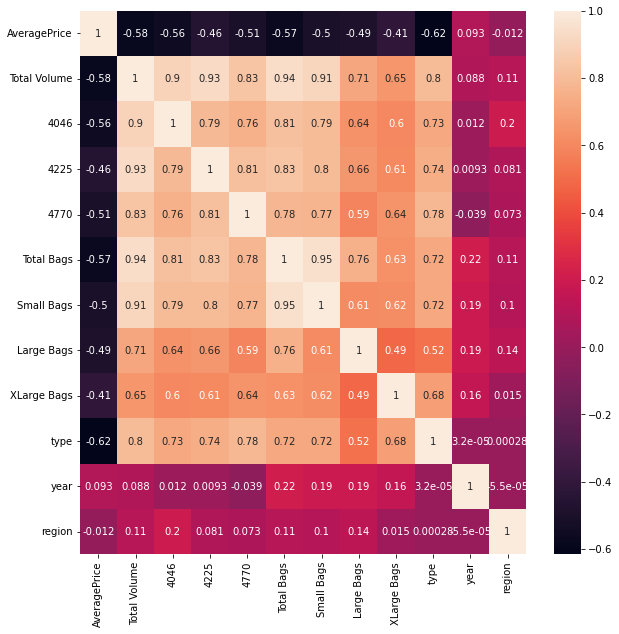

In [799]:
plt.figure(figsize=(10,10))
sns.heatmap(df_corr,annot = True)

Multicolinearity problem is there, so using Variance Inflation Factor & SelectKBest,for selecting Features.

**- Variance Inflation Factor.**

In [24]:
x = avacado.drop('AveragePrice',axis = 1)
y = avacado.AveragePrice

In [25]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [26]:
a = x_scaled.shape[1]
a

11

In [27]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(a)]

In [28]:
vif['Feature'] = x.columns
vif

,vif,Feature
0,50.238922,Total Volume
1,7.372942,4046
2,11.137158,4225
3,4.248412,4770
4,33.197494,Total Bags
5,15.789089,Small Bags
6,3.578609,Large Bags
7,2.160513,XLarge Bags
8,3.741911,type
9,1.316394,year


**- SelectKBest.**

In [29]:
best_feature = SelectKBest(score_func = f_classif, k =10)
fit = best_feature.fit(x,y)
av_score = pd.DataFrame(fit.scores_)
av_column = pd.DataFrame(x.columns)

In [30]:
feature_score = pd.concat([av_column,av_score], axis = 1)
feature_score.columns = ['Feature Name','Scores']
feature_score.nlargest(10,'Scores')

,Feature Name,Scores
8,type,53.269112
0,Total Volume,42.626516
1,4046,38.626126
4,Total Bags,38.205325
3,4770,30.616709
5,Small Bags,26.952344
6,Large Bags,25.472190
2,4225,23.958862
7,XLarge Bags,17.859007
9,year,3.056698


In [31]:
x.drop(columns = ['year','region'],axis = 1,inplace = True)

In [32]:
x.shape

(18249, 9)

In [33]:
x.columns

Index(['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type'],
      dtype='object')

Taking features that have score more than 10.

## Regression :

## Training the Model:

**- Train Test Split.**

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, random_state = 90, test_size = 0.25)

**- Creating The function for the training and testing score.**

In [35]:
def score(clas, x_train, x_test, y_train, y_test, train = True):
    if train:
        y_pred = clas.predict(x_train)
        print('\n ----- Train Result ----- \n')
        print('Accuracy Score:', metrics.r2_score(y_train,y_pred))
    
    elif train == False:
        pred = clas.predict(x_test)
        print('\n ----- Test Result ----- \n')
        print('Accuracy Score:', metrics.r2_score(y_test,pred))
        print('\n ----- Model Evaluation ----- \n')
        print('Mean Absolute Error:',mean_absolute_error(y_test,pred))
        print('\n')
        plt.scatter(y_test,pred)
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.title("Actual VS Prediction")
        plt.show()

**- Model Instantiating.**

In [36]:
rfr = RandomForestRegressor()
ada = AdaBoostRegressor()
knn = KNeighborsRegressor()
gb = GradientBoostingRegressor()
svr = SVR()

**- RandomForest Regressor.**


 ----- Train Result ----- 

Accuracy Score: 0.9781494346964514

 ----- Test Result ----- 

Accuracy Score: 0.8432688960370498

 ----- Model Evaluation ----- 

Mean Absolute Error: 0.11150517203594128




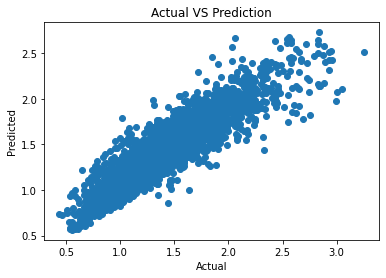

In [37]:
rfr.fit(x_train,y_train)
score(rfr, x_train,x_test,y_train,y_test,train = True)
score(rfr, x_train,x_test,y_train,y_test,train = False)

**- AdaBoost Regressor.**


 ----- Train Result ----- 

Accuracy Score: 0.4917814525556222

 ----- Test Result ----- 

Accuracy Score: 0.46732355159781025

 ----- Model Evaluation ----- 

Mean Absolute Error: 0.2347073209798277




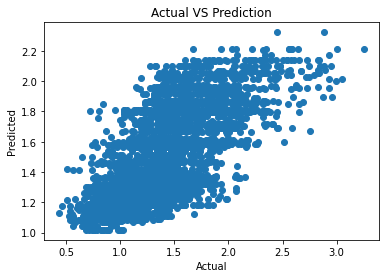

In [38]:
ada.fit(x_train,y_train)
score(ada, x_train,x_test,y_train,y_test,train = True)
score(ada, x_train,x_test,y_train,y_test,train = False)

**- KNeighbors Regressor.**


 ----- Train Result ----- 

Accuracy Score: 0.8985403502671343

 ----- Test Result ----- 

Accuracy Score: 0.8254656164386642

 ----- Model Evaluation ----- 

Mean Absolute Error: 0.11444444444444445




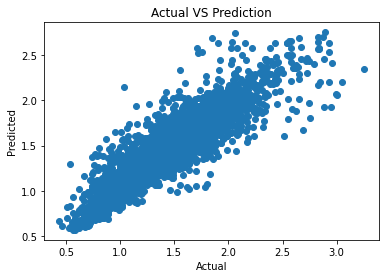

In [39]:
knn.fit(x_train,y_train)
score(knn, x_train,x_test,y_train,y_test,train = True)
score(knn, x_train,x_test,y_train,y_test,train = False)

**- GradientBoosting Regressor.**


 ----- Train Result ----- 

Accuracy Score: 0.7023076082048255

 ----- Test Result ----- 

Accuracy Score: 0.6705429921184936

 ----- Model Evaluation ----- 

Mean Absolute Error: 0.17244869838818175




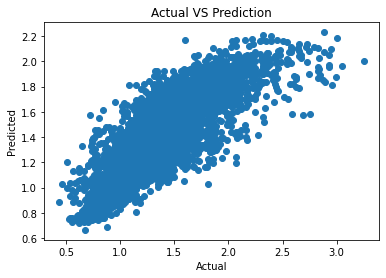

In [40]:
gb.fit(x_train,y_train)
score(gb, x_train,x_test,y_train,y_test,train = True)
score(gb, x_train,x_test,y_train,y_test,train = False)

**- SuperVector Regressor.**


 ----- Train Result ----- 

Accuracy Score: 0.726150365218843

 ----- Test Result ----- 

Accuracy Score: 0.6999480385810067

 ----- Model Evaluation ----- 

Mean Absolute Error: 0.16041080721796455




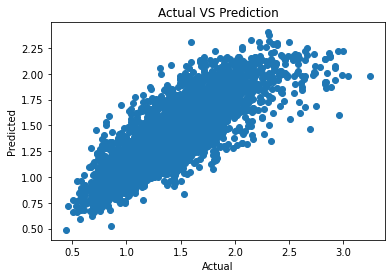

In [41]:
svr.fit(x_train,y_train)
score(svr, x_train,x_test,y_train,y_test,train = True)
score(svr, x_train,x_test,y_train,y_test,train = False)

                   RandomForest Regressor Model, is giving the best accuracy score.

In [42]:
filename = 'Avacado_reg.pickle'
pickle.dump(rfr, open(filename, 'wb'))

## Classification:

## Training the Model:

**- Seperating Independent and Dependent columns.**

In [47]:
x = avacado.drop(['type'],axis = 1)
y = avacado.type

**- Creating The function for the training and testing score.**

In [48]:
def score(clas, x_train, x_test, y_train, y_test, train = True):
    if train:
        y_pred = clas.predict(x_train)
        print('\n ----- Train Result ----- \n')
        print('Accuracy Score:', accuracy_score(y_train,y_pred))
        print('\n ----- Classification Report ----- \n', classification_report(y_train,y_pred))
        print('\n ----- Confusion matrix ----- \n', confusion_matrix(y_train,y_pred))
    
    elif train == False:
        pred = clas.predict(x_test)
        print('\n ----- Test Result ----- \n')
        print('Accuracy Score:', accuracy_score(y_test,pred))
        print('\n ----- Classification Report ----- \n', classification_report(y_test,pred))
        print('\n ----- Confusion matrix ----- \n', confusion_matrix(y_test,pred))

**- Creating The function for roc curve and confusion matrix.**

In [49]:
def roc_curve_plot(clas, x_test, y_test):
    print('Roc Curve')
    plot_roc_curve(clas, x_test, y_test) 
    
def confusion_matrix_plot(clas, x_test, y_test):
    pred = clas.predict(x_test)
    print('Confusion Matrix')
    sns.heatmap(confusion_matrix(y_test.values.ravel(),pred), annot=True,fmt="d")
    plt.rcParams["figure.figsize"]=(5,5)
    plt.show()

**- Model Instantiating.**

In [53]:
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
knnc = KNeighborsClassifier()
gr = GradientBoostingClassifier()

**- Train Test Split.**

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=9)

**- RandomForest Classifier.**

In [55]:
rf.fit(x_train,y_train)
score(rf, x_train, x_test, y_train, y_test, train = True)
score(rf, x_train, x_test, y_train, y_test, train = False)


 ----- Train Result ----- 

Accuracy Score: 1.0

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6790
           1       1.00      1.00      1.00      6896

    accuracy                           1.00     13686
   macro avg       1.00      1.00      1.00     13686
weighted avg       1.00      1.00      1.00     13686


 ----- Confusion matrix ----- 
 [[6790    0]
 [   0 6896]]

 ----- Test Result ----- 

Accuracy Score: 0.9964935349550734

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2333
           1       1.00      1.00      1.00      2230

    accuracy                           1.00      4563
   macro avg       1.00      1.00      1.00      4563
weighted avg       1.00      1.00      1.00      4563


 ----- Confusion matrix ----- 
 [[2324    9]
 [   7 2223]]


Roc Curve


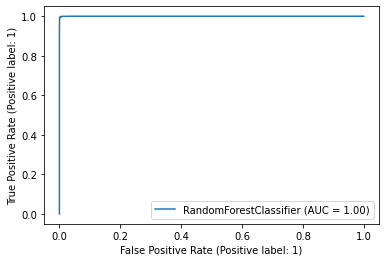

In [56]:
roc_curve_plot(rf,x_test, y_test)

Confusion Matrix


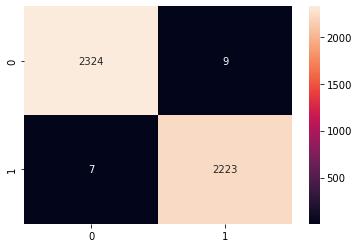

In [57]:
confusion_matrix_plot(rf,x_test, y_test)

In [58]:
a_rf = np.array(y_test)
predicted_rf = np.array(rf.predict(x_test))
df_rf = pd.DataFrame({'Original':a_rf,'Predicted':predicted_rf})
df_rf

,Original,Predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
4558,0,0
4559,0,0
4560,1,1
4561,0,0


**- AdaBoost Classifier.**

In [59]:
ada.fit(x_train,y_train)
score(ada, x_train, x_test, y_train, y_test, train = True)
score(ada, x_train, x_test, y_train, y_test, train = False)


 ----- Train Result ----- 

Accuracy Score: 0.9949583516001753

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      6790
           1       0.99      1.00      1.00      6896

    accuracy                           0.99     13686
   macro avg       0.99      0.99      0.99     13686
weighted avg       0.99      0.99      0.99     13686


 ----- Confusion matrix ----- 
 [[6750   40]
 [  29 6867]]

 ----- Test Result ----- 

Accuracy Score: 0.9916721455182994

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2333
           1       0.99      0.99      0.99      2230

    accuracy                           0.99      4563
   macro avg       0.99      0.99      0.99      4563
weighted avg       0.99      0.99      0.99      4563


 ----- Confusion matrix ----- 
 [[2314   19]
 [  19 2211]]


Roc Curve


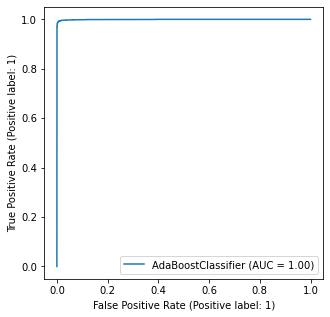

In [60]:
roc_curve_plot(ada,x_test, y_test)

Confusion Matrix


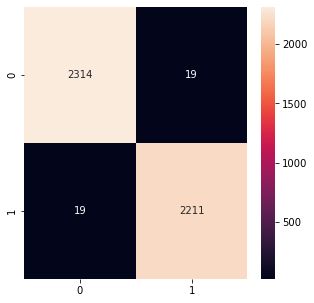

In [61]:
confusion_matrix_plot(ada,x_test, y_test)

In [62]:
a_ada = np.array(y_test)
predicted_ada = np.array(ada.predict(x_test))
df_ada = pd.DataFrame({'Original':a_ada,'Predicted':predicted_ada})
df_ada

,Original,Predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
4558,0,0
4559,0,0
4560,1,1
4561,0,0


**- KNeighbors Classifier.**

In [63]:
knnc.fit(x_train,y_train)
score(knnc, x_train, x_test, y_train, y_test, train = True)
score(knnc, x_train, x_test, y_train, y_test, train = False)


 ----- Train Result ----- 

Accuracy Score: 0.9997077305275464

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6790
           1       1.00      1.00      1.00      6896

    accuracy                           1.00     13686
   macro avg       1.00      1.00      1.00     13686
weighted avg       1.00      1.00      1.00     13686


 ----- Confusion matrix ----- 
 [[6790    0]
 [   4 6892]]

 ----- Test Result ----- 

Accuracy Score: 1.0

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2333
           1       1.00      1.00      1.00      2230

    accuracy                           1.00      4563
   macro avg       1.00      1.00      1.00      4563
weighted avg       1.00      1.00      1.00      4563


 ----- Confusion matrix ----- 
 [[2333    0]
 [   0 2230]]


Roc Curve


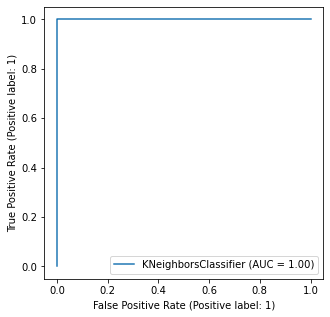

In [64]:
roc_curve_plot(knnc,x_test, y_test)

Confusion Matrix


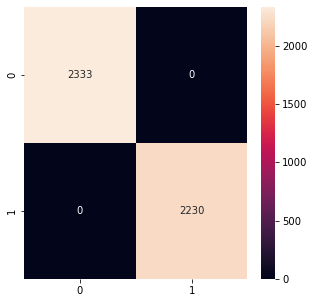

In [65]:
confusion_matrix_plot(knnc,x_test, y_test)

In [66]:
a_knnc = np.array(y_test)
predicted_knnc = np.array(knnc.predict(x_test))
df_knnc = pd.DataFrame({'Original':a_knnc,'Predicted':predicted_knnc})
df_knnc

,Original,Predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
4558,0,0
4559,0,0
4560,1,1
4561,0,0


**- GradientBoosting Classifier.**

In [67]:
gr.fit(x_train,y_train)
score(gr, x_train, x_test, y_train, y_test, train = True)
score(gr, x_train, x_test, y_train, y_test, train = False)


 ----- Train Result ----- 

Accuracy Score: 0.9975887768522578

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6790
           1       1.00      1.00      1.00      6896

    accuracy                           1.00     13686
   macro avg       1.00      1.00      1.00     13686
weighted avg       1.00      1.00      1.00     13686


 ----- Confusion matrix ----- 
 [[6769   21]
 [  12 6884]]

 ----- Test Result ----- 

Accuracy Score: 0.9949594564979181

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      2333
           1       0.99      1.00      0.99      2230

    accuracy                           0.99      4563
   macro avg       0.99      1.00      0.99      4563
weighted avg       0.99      0.99      0.99      4563


 ----- Confusion matrix ----- 
 [[2317   16]
 [   7 2223]]


Roc Curve


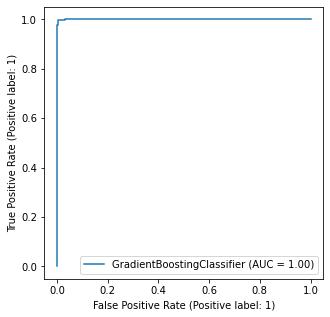

In [68]:
roc_curve_plot(gr,x_test, y_test)

Confusion Matrix


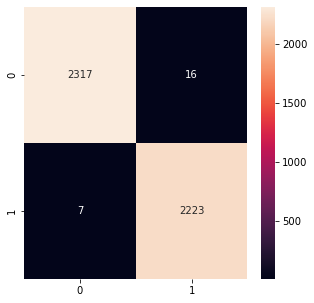

In [69]:
confusion_matrix_plot(gr,x_test, y_test)

In [70]:
a_gr = np.array(y_test)
predicted_gr = np.array(gr.predict(x_test))
df_gr = pd.DataFrame({'Original':a_gr,'Predicted':predicted_gr})
df_gr

,Original,Predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
4558,0,0
4559,0,0
4560,1,1
4561,0,0


              All the classification models are giving almost equal score, so can use anyone of them.

In [71]:
filename = 'avacado_class.pickle'
pickle.dump(knnc, open(filename, 'wb'))